In [1]:
# importamos bibliotecas cómputo de matrices
import numpy as np

# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

# Matriz de Leslie

La Matriz de Leslie se usa en ecología para modelar los cambios en una
población de organismos a través de un lapso. En este modelo la
población se divide en grupos de edad. Para cada unidad de tiempo la
población se representa con un vector con un elemento por cada clase
de edad.

Se trata de una matriz cuadrada con tantos renglones y columnas como
el vector de clases tiene elementos.

$$ L=\left[\begin{array}{cccc}
0 & 1 & 2 & 1\\
0.8 & 0 & 0 & 0\\
0 & 0.7 & 0 & 0\\
0 & 0 & 0.5 & 0
\end{array}\right] $$


In [2]:
# el modelo de Leslie
L = np.array([[0,     1,  2, 1],
              [0.8,   0,  0, 0],
              [0,   0.7,  0, 0],
              [0,     0, 0.5,0]])

# las cuatro clases de edad tienen 100 pobladoras al inicio
poblacion_inicial = [100,100,100,100]

# lista para contener un vector de tamaños de población por clase para
# cada unidad de tiempo transcurrida en la simulación. Inicializamos con
# la poblacion inicial en el tiempo cero.
historico_de_poblaciones  = [ poblacion_inicial, ]


# en otra lista guardaremos las proporciones de cada clase respecto del
# total de la población.
historico_de_proporciones = []

## Al paso del tiempo

En cada paso de tiempo el vector de clases de población se multiplica por la matriz Leslie para generar el vector del siguiente paso.


In [3]:
# iteramos 25 veces
for t in range(25):
    # nuevo vector
    vector_de_clases = np.dot(L, historico_de_poblaciones[t])
    # al histórico
    historico_de_poblaciones.append( vector_de_clases )
    
    poblacion_total        = vector_de_clases.sum()
    vector_de_proporciones = [clase/poblacion_total for clase in vector_de_clases]
    historico_de_proporciones.append( vector_de_proporciones )


## Tamaños de clases de poblaciones

Al Paso del tiempo las poblaciones crecen.

In [4]:
np.array(historico_de_poblaciones[0:10])

array([[  100.    ,   100.    ,   100.    ,   100.    ],
       [  400.    ,    80.    ,    70.    ,    50.    ],
       [  270.    ,   320.    ,    56.    ,    35.    ],
       [  467.    ,   216.    ,   224.    ,    28.    ],
       [  692.    ,   373.6   ,   151.2   ,   112.    ],
       [  788.    ,   553.6   ,   261.52  ,    75.6   ],
       [ 1152.24  ,   630.4   ,   387.52  ,   130.76  ],
       [ 1536.2   ,   921.792 ,   441.28  ,   193.76  ],
       [ 1998.112 ,  1228.96  ,   645.2544,   220.64  ],
       [ 2740.1088,  1598.4896,   860.272 ,   322.6272]])

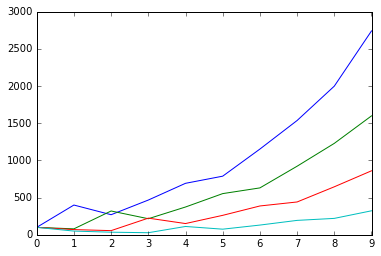

In [5]:
plt.plot(historico_de_poblaciones[0:10])

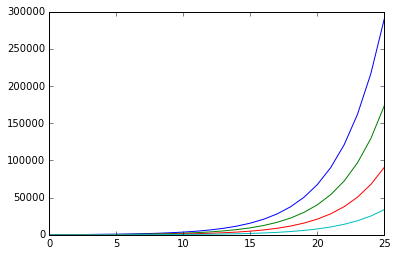

In [6]:
plt.plot(historico_de_poblaciones)

## Proporciones de tamaños de clases de poblaciones

Pero el tamaño proporcional de las clases de subpoblación se estabiliza.

In [7]:
np.array(historico_de_proporciones[0:10])

array([[ 0.66666667,  0.13333333,  0.11666667,  0.08333333],
       [ 0.39647577,  0.46989721,  0.08223201,  0.05139501],
       [ 0.49946524,  0.23101604,  0.23957219,  0.02994652],
       [ 0.52077062,  0.28115593,  0.11378688,  0.08428657],
       [ 0.46940526,  0.32977507,  0.15578536,  0.04503431],
       [ 0.5007736 ,  0.27397737,  0.16841959,  0.05682944],
       [ 0.49666476,  0.29802213,  0.14266907,  0.06264403],
       [ 0.48818187,  0.30026144,  0.15764957,  0.05390711],
       [ 0.49626188,  0.28950291,  0.15580411,  0.0584311 ],
       [ 0.49326105,  0.29691704,  0.15156021,  0.0582617 ]])

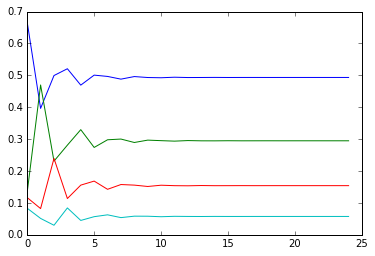

In [8]:
plt.plot(historico_de_proporciones)